In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('raw_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 5000 non-null int64
sold_price          5000 non-null float64
zipcode             5000 non-null int64
longitude           5000 non-null float64
latitude            5000 non-null float64
lot_acres           4990 non-null float64
taxes               5000 non-null float64
year_built          5000 non-null int64
bedrooms            5000 non-null int64
bathrooms           5000 non-null object
sqrt_ft             5000 non-null object
garage              5000 non-null object
kitchen_features    5000 non-null object
fireplaces          5000 non-null object
floor_covering      5000 non-null object
HOA                 5000 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 625.1+ KB


From the summary it can be seen that there are 16 columns and 10 null values in the column lot-acres. There are 9 columns numeric and the 7 clumns that are shown object type
Lets look at the summary of the numeric data.

In [4]:
data.describe()
#data.columns

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


From the summary, we can see that minimum values lot_acres,taxes and year_built is zero. Certainly they cannot be zero.So, there are many missing values in the databases. 
Lets look at the first 5 columns to get an idea of the housing database. 

In [5]:
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2,"Carpet, Concrete",141.67


## Identifying Missing values

From the first 5 columns we can see that.
Column bathrooms should be a numeric, but panda considers it as object.
Column sqrt_ft should be a numeric, but panda considers it as object.
Column garage should be a numeric column,but panda considers it as object.
Column fireplace is a numeric column,but panda considers it as object.
Column HOA is a numrcic column,but panda considers it as object.
Lets convert those colums to numeric and the string values will be replaced as missing (NaN)

In [6]:
data['bathrooms'] = pd.to_numeric(data['bathrooms'],errors = 'coerce')
data['sqrt_ft'] = pd.to_numeric(data['sqrt_ft'],errors = 'coerce')
data['garage'] = pd.to_numeric(data['garage'],errors = 'coerce')
data['fireplaces'] = pd.to_numeric(data['fireplaces'],errors = 'coerce')
data['HOA'] = pd.to_numeric(data['HOA'],errors = 'coerce')

In [7]:
print(data['bathrooms'].isnull().sum())
print(data['sqrt_ft'].isnull().sum())
print(data['garage'].isnull().sum())
print(data['fireplaces'].isnull().sum())
print(data['HOA'].isnull().sum())

6
56
7
25
580


Lets look at the data again

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 5000 non-null int64
sold_price          5000 non-null float64
zipcode             5000 non-null int64
longitude           5000 non-null float64
latitude            5000 non-null float64
lot_acres           4990 non-null float64
taxes               5000 non-null float64
year_built          5000 non-null int64
bedrooms            5000 non-null int64
bathrooms           4994 non-null float64
sqrt_ft             4944 non-null float64
garage              4993 non-null float64
kitchen_features    5000 non-null object
fireplaces          4975 non-null float64
floor_covering      5000 non-null object
HOA                 4420 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 625.1+ KB


In [9]:
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.00
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.00
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.00
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.00
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0.00
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,8921.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220.00
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,5238.0,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421.00
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6.0,6480.0,3.0,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


Lets check the two colums kitchen_features and floor_covering if they had any numeric value. If they have any numeric value that value we do not want and we will make them null.

In [10]:
NM_kitchen_features= pd.to_numeric(data['kitchen_features'],errors = 'coerce')
NM_floor_covering = pd.to_numeric(data['floor_covering'],errors = 'coerce')

In [11]:
NM_kitchen_features.isnull().sum()

5000

In [12]:
NM_floor_covering.isnull().sum()

5000

It means that there are no numeric value in 'kitchen_features' and 'floor_covering'. It doesn't mean that there is no missing value. We can check if there is any string "None".

In [13]:
NMM_floor_covering=data['floor_covering'].replace("None",np.nan)

In [14]:
NMM_floor_covering.isnull().sum()

1

In [15]:
NMM_kitchen_features=data['kitchen_features'].replace("None",np.nan)
NMM_kitchen_features.isnull().sum()

33

Thus the two columns have some missing values and we need to convert them to Null value to be consistent with the other columns.

In [16]:
data['floor_covering'].replace("None",np.nan,inplace=True)
data['kitchen_features'].replace("None",np.nan, inplace=True)

In [17]:
# Lets look at the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 5000 non-null int64
sold_price          5000 non-null float64
zipcode             5000 non-null int64
longitude           5000 non-null float64
latitude            5000 non-null float64
lot_acres           4990 non-null float64
taxes               5000 non-null float64
year_built          5000 non-null int64
bedrooms            5000 non-null int64
bathrooms           4994 non-null float64
sqrt_ft             4944 non-null float64
garage              4993 non-null float64
kitchen_features    4967 non-null object
fireplaces          4975 non-null float64
floor_covering      4999 non-null object
HOA                 4420 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 625.1+ KB


In 'lot_acres','tax' and 'year built' column the minimum value is 0. Surely these values cannot be zero.

In [18]:
print(data[data['lot_acres']==0]['lot_acres'].count())
print(data[data['taxes']==0]['taxes'].count())
print(data[data['year_built']==0]['year_built'].count())

35
22
5


So, 
There are 35 houses with 'lot acres' is zero.
There are 22 houses with 'taxes' is zero.
There are 22 houses with 'year_built' is zero.

We can idetify them as missing values.

In [19]:
data['lot_acres'].replace(0,np.nan, inplace=True)
data['taxes'].replace(0,np.nan, inplace=True)
data['year_built'].replace(0,np.nan, inplace=True)

Just check if the zero values are removed or not.

In [20]:
print(data[data['lot_acres']==0]['lot_acres'].count())
print(data[data['taxes']==0]['taxes'].count())
print(data[data['year_built']==0]['year_built'].count())

0
0
0


In [21]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4955.000000,4.978000e+03,4995.000000,5000.000000,4994.000000,4944.000000,4993.000000,4975.000000,4420.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.694242,9.444383e+03,1994.322322,3.933800,3.829896,3716.366828,2.816143,1.885226,82.815857
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.865996,1.733192e+05,17.737253,1.245362,1.387063,1120.683515,1.192946,1.136578,92.380597
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.020000,1.000000e+00,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.590000,4.822200e+03,1987.000000,3.000000,3.000000,3047.000000,2.000000,1.000000,8.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.243165e+03,1999.000000,4.000000,4.000000,3512.000000,3.000000,2.000000,55.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.775000,8.099500e+03,2006.000000,4.000000,4.000000,4130.250000,3.000000,3.000000,134.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


## Indentifying outliers

Scatter plot is used.

Text(0.5, 1.0, 'Sold Prices vs lot acres')

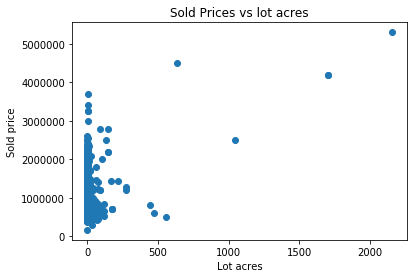

In [22]:
#sns.boxplot(x=data['lot_acres'])
plt.scatter(data['lot_acres'],data['sold_price'], marker='o');
plt.xlabel('Lot acres') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs lot acres")

Text(0.5, 1.0, 'Sold Prices vs Taxes')

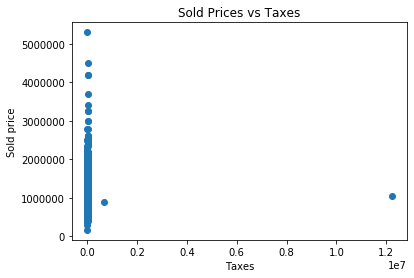

In [23]:
plt.scatter(data['taxes'],data['sold_price'], marker='o');
plt.xlabel('Taxes') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs Taxes")

It seems that there are some otliers in the tax column. We will count and remove them.

In [24]:
data['taxes'][data['taxes']>0.05e7].count()

2

Text(0.5, 1.0, 'Sold Prices vs MLS')

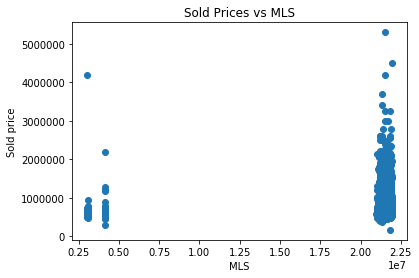

In [25]:
plt.scatter(data['MLS'],data['sold_price'], marker='o');
plt.xlabel('MLS') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs MLS")

Text(0.5, 1.0, 'Sold Prices vs Bedrooms')

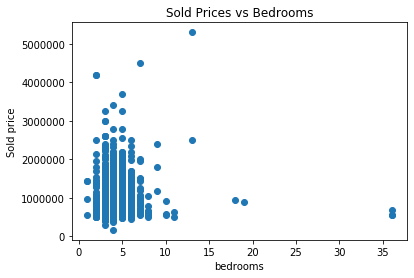

In [26]:
plt.scatter(data['bedrooms'],data['sold_price'], marker='o');
plt.xlabel('bedrooms') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs Bedrooms")

It seems that several values on bedroom column seems to outlier. We need to count and remove them

In [27]:
data['bedrooms'][data['bedrooms']>25].count()

3

There are atleast 3 outlier values.

Text(0, 0.5, 'Sold price')

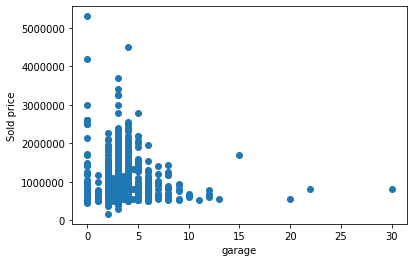

In [28]:
plt.scatter(data['garage'],data['sold_price'], marker='o');
plt.xlabel('garage') 
plt.ylabel('Sold price')

Text(0.5, 1.0, 'Sold Prices vs Bathrooms')

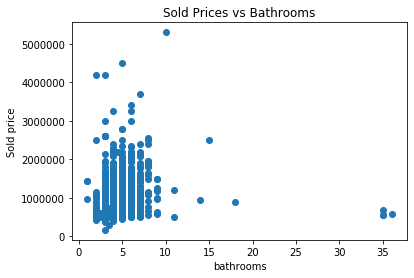

In [29]:
plt.scatter(data['bathrooms'],data['sold_price'], marker='o');
plt.xlabel('bathrooms') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs Bathrooms")

Text(0.5, 1.0, 'Sold Prices vs HOA')

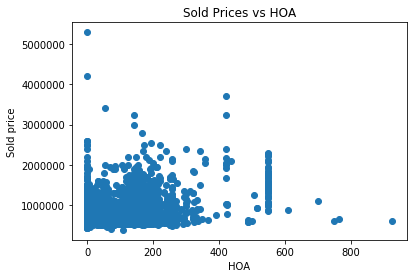

In [30]:
plt.scatter(data['HOA'],data['sold_price'], marker='o');
plt.xlabel('HOA') 
plt.ylabel('Sold price')
plt.title("Sold Prices vs HOA")

Text(0.5, 1.0, "'bathrooms' vs 'bedrooms'")

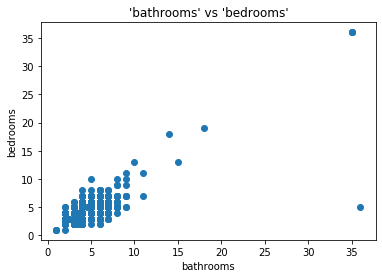

In [31]:
plt.scatter(data['bathrooms'],data['bedrooms'], marker='o');
plt.xlabel('bathrooms') 
plt.ylabel('bedrooms')
plt.title("'bathrooms' vs 'bedrooms'")

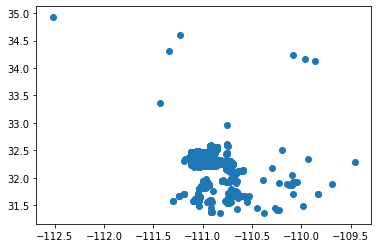

In [32]:
plt.scatter(data['longitude'],data['latitude'], marker='o');

## Replacing/Removing missing/outliers values

We have removed the data where lot_acres, kitchen_feature and floor_covering is missing. 

In [33]:
data.dropna(subset=['kitchen_features', 'floor_covering'],inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 4967 non-null int64
sold_price          4967 non-null float64
zipcode             4967 non-null int64
longitude           4967 non-null float64
latitude            4967 non-null float64
lot_acres           4922 non-null float64
taxes               4945 non-null float64
year_built          4962 non-null float64
bedrooms            4967 non-null int64
bathrooms           4962 non-null float64
sqrt_ft             4912 non-null float64
garage              4960 non-null float64
kitchen_features    4967 non-null object
fireplaces          4943 non-null float64
floor_covering      4967 non-null object
HOA                 4391 non-null float64
dtypes: float64(11), int64(3), object(2)
memory usage: 659.7+ KB


In [35]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,4.967000e+03,4.967000e+03,4967.000000,4967.000000,4967.000000,4922.000000,4.945000e+03,4962.000000,4967.000000,4962.000000,4912.000000,4960.000000,4943.000000,4391.000000
mean,2.127329e+07,7.750120e+05,85723.078921,-110.911933,32.309100,4.669671,9.453159e+03,1994.312979,3.927924,3.823761,3709.263559,2.816835,1.881853,82.654997
std,2.392432e+06,3.191210e+05,38.045295,0.120679,0.177066,52.012014,1.738962e+05,17.718856,1.229602,1.380285,1107.498886,1.193123,1.133626,91.650756
min,3.042851e+06,3.000000e+05,85118.000000,-112.520168,31.356362,0.020000,1.000000e+00,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140744e+07,5.850000e+05,85718.000000,-110.979138,32.277778,0.590000,4.822000e+03,1987.000000,3.000000,3.000000,3047.000000,2.000000,1.000000,8.000000
50%,2.161507e+07,6.750000e+05,85737.000000,-110.923317,32.318525,0.990000,6.234290e+03,1999.000000,4.000000,4.000000,3508.000000,3.000000,2.000000,55.000000
75%,2.180502e+07,8.350000e+05,85749.000000,-110.858963,32.394589,1.760000,8.085320e+03,2006.000000,4.000000,4.000000,4123.500000,3.000000,3.000000,134.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


In [36]:
print(data[data['lot_acres']==0]['lot_acres'].count())
print(data[data['taxes']==0]['taxes'].count())
print(data[data['year_built']==0]['year_built'].count())

0
0
0


In [37]:
median_LTa = data['lot_acres'].median()
data['lot_acres'].replace(np.nan,median_LTa, inplace=True)

In [38]:
print(data[data['lot_acres']==0]['lot_acres'].count())

0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 4967 non-null int64
sold_price          4967 non-null float64
zipcode             4967 non-null int64
longitude           4967 non-null float64
latitude            4967 non-null float64
lot_acres           4967 non-null float64
taxes               4945 non-null float64
year_built          4962 non-null float64
bedrooms            4967 non-null int64
bathrooms           4962 non-null float64
sqrt_ft             4912 non-null float64
garage              4960 non-null float64
kitchen_features    4967 non-null object
fireplaces          4943 non-null float64
floor_covering      4967 non-null object
HOA                 4391 non-null float64
dtypes: float64(11), int64(3), object(2)
memory usage: 659.7+ KB


In [40]:
median_TX=data['taxes'].median()

data['taxes']= np.where(data['taxes'] >0.05e7, median_TX,data['taxes'])

Text(0, 0.5, 'Sold price')

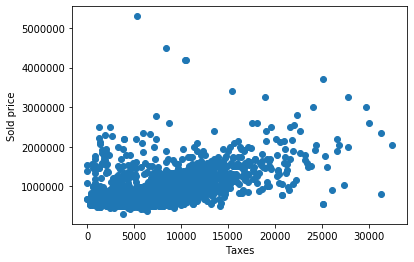

In [41]:
plt.scatter(data['taxes'],data['sold_price'], marker='o');
plt.xlabel('Taxes') 
plt.ylabel('Sold price')

In [42]:
median_TX = data['taxes'].median()
data['taxes'].replace(np.nan,median_TX, inplace=True)

Lets remove the Null values in year_built column

In [43]:
median_YB = data['year_built'].median()
data['year_built'].replace(np.nan,median_YB, inplace=True)

Lets remove the Null values in bathrooms column

In [44]:
median_BthR = data['bathrooms'].median()
data['bathrooms'].replace(np.nan,median_BthR, inplace=True)

Lets remove the Null values in sqrt_ft column

In [45]:
# median_Sft = data['sqrt_ft'].median()
data['sqrt_ft'].replace(np.nan,data['sqrt_ft'].median(), inplace=True)

Lets remove the Null values in sqrt_ft column

In [46]:
data['garage'].replace(np.nan,data['garage'].median(), inplace=True)
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,4.967000e+03,4.967000e+03,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4943.000000,4391.000000
mean,2.127329e+07,7.750120e+05,85723.078921,-110.911933,32.309100,4.636334,6847.666255,1994.317697,3.927924,3.823938,3707.034951,2.817093,1.881853,82.654997
std,2.392432e+06,3.191210e+05,38.045295,0.120679,0.177066,51.776995,3521.293932,17.710558,1.229602,1.379601,1101.550261,1.192301,1.133626,91.650756
min,3.042851e+06,3.000000e+05,85118.000000,-112.520168,31.356362,0.020000,1.000000,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140744e+07,5.850000e+05,85718.000000,-110.979138,32.277778,0.600000,4827.280000,1987.000000,3.000000,3.000000,3051.000000,2.000000,1.000000,8.000000
50%,2.161507e+07,6.750000e+05,85737.000000,-110.923317,32.318525,0.990000,6234.290000,1999.000000,4.000000,4.000000,3508.000000,3.000000,2.000000,55.000000
75%,2.180502e+07,8.350000e+05,85749.000000,-110.858963,32.394589,1.745000,8064.195000,2006.000000,4.000000,4.000000,4113.500000,3.000000,3.000000,134.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,32442.220000,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


Lets remove the Null values in fireplaces column

In [47]:
data['fireplaces'].replace(np.nan,data['fireplaces'].median(), inplace=True)
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,4.967000e+03,4.967000e+03,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4391.000000
mean,2.127329e+07,7.750120e+05,85723.078921,-110.911933,32.309100,4.636334,6847.666255,1994.317697,3.927924,3.823938,3707.034951,2.817093,1.882424,82.654997
std,2.392432e+06,3.191210e+05,38.045295,0.120679,0.177066,51.776995,3521.293932,17.710558,1.229602,1.379601,1101.550261,1.192301,1.130913,91.650756
min,3.042851e+06,3.000000e+05,85118.000000,-112.520168,31.356362,0.020000,1.000000,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140744e+07,5.850000e+05,85718.000000,-110.979138,32.277778,0.600000,4827.280000,1987.000000,3.000000,3.000000,3051.000000,2.000000,1.000000,8.000000
50%,2.161507e+07,6.750000e+05,85737.000000,-110.923317,32.318525,0.990000,6234.290000,1999.000000,4.000000,4.000000,3508.000000,3.000000,2.000000,55.000000
75%,2.180502e+07,8.350000e+05,85749.000000,-110.858963,32.394589,1.745000,8064.195000,2006.000000,4.000000,4.000000,4113.500000,3.000000,3.000000,134.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,32442.220000,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


Lets remove the Null values in HOA column

In [48]:
data['HOA'].replace(np.nan,0, inplace=True)
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,4.967000e+03,4.967000e+03,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000
mean,2.127329e+07,7.750120e+05,85723.078921,-110.911933,32.309100,4.636334,6847.666255,1994.317697,3.927924,3.823938,3707.034951,2.817093,1.882424,73.069879
std,2.392432e+06,3.191210e+05,38.045295,0.120679,0.177066,51.776995,3521.293932,17.710558,1.229602,1.379601,1101.550261,1.192301,1.130913,90.144863
min,3.042851e+06,3.000000e+05,85118.000000,-112.520168,31.356362,0.020000,1.000000,1893.000000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140744e+07,5.850000e+05,85718.000000,-110.979138,32.277778,0.600000,4827.280000,1987.000000,3.000000,3.000000,3051.000000,2.000000,1.000000,0.000000
50%,2.161507e+07,6.750000e+05,85737.000000,-110.923317,32.318525,0.990000,6234.290000,1999.000000,4.000000,4.000000,3508.000000,3.000000,2.000000,44.000000
75%,2.180502e+07,8.350000e+05,85749.000000,-110.858963,32.394589,1.745000,8064.195000,2006.000000,4.000000,4.000000,4113.500000,3.000000,3.000000,122.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,32442.220000,2019.000000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 4967 non-null int64
sold_price          4967 non-null float64
zipcode             4967 non-null int64
longitude           4967 non-null float64
latitude            4967 non-null float64
lot_acres           4967 non-null float64
taxes               4967 non-null float64
year_built          4967 non-null float64
bedrooms            4967 non-null int64
bathrooms           4967 non-null float64
sqrt_ft             4967 non-null float64
garage              4967 non-null float64
kitchen_features    4967 non-null object
fireplaces          4967 non-null float64
floor_covering      4967 non-null object
HOA                 4967 non-null float64
dtypes: float64(11), int64(3), object(2)
memory usage: 659.7+ KB


In [50]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941.0,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997.0,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997.0,2,3.0,3508.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930.0,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995.0,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


Lets check if there is any Null values.

In [51]:
data.isnull().sum().sum()

0

Lets write the data in a csv file

In [53]:
data.to_csv("Cleaned_housing_data.csv",index=False)